In [6]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Hypothesis testing & statistical inference
Given the various features of the wine data, we are curious about finding whether wine quality is affected by acidity, risidual sugar, chlorides, or total sulfur dioxide. Therefore, we derive 3 hypotheses and plot their distributions respectively to determine which hypothesis test we should use. We have removed outliers and duplicates in the original dataset to rule out the possible noises of the mean. In these tests, the alpha level we selected is 0.05

In [13]:
data = pd.read_csv("winequality-red.csv")
# drop duplicate entry
data.drop_duplicates(inplace=True, keep="first") # Drop duplications, keep the first duplictaed row
data.reset_index(inplace=True, drop=True) # Reset dataframe index to continuous integers
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
# z-score the data and drop outliers
data_z_scored = (data - data.mean())/data.std()
threshold = 5 # BoxPlot boundary is 1.5: mean +/- 1.5*std. Here I used 5 to filter out very extreme values.
data_cleaned = data[data_z_scored.abs() <= threshold].dropna().reset_index(drop=True) # All rows with entries (z-scored) >3 are dropped
data_cleaned # 1359 rows -> 1232 rows



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1319,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1320,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1321,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1322,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


 ### Acidity and wine quality
 First, we aim to investigate whether a wine with higher acidity impacts wine quality. We deem a wine is of higher acidity is the one having lower pH values than average. Therefore, we structure our null hypothesis as follows:
 H0: Wines of higher acidity has no impact on average wine quality
 H1: Wines of higher acidity has an impact on average wine quality
 Since we are comparing the sample mean of the wine quality between 2 groups with each iid sample, we run the independent t test. With a t-test score of -2.19 and a p value of 0.02 < 0.05, we here reject the null hypothesis that higher acidity has no impact on wine quality

Ttest_indResult(statistic=-2.1966989716990017, pvalue=0.02821503549350013)


(array([  3.,   0.,  15.,   0., 296.,   0., 254.,   0.,  96.,  11.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

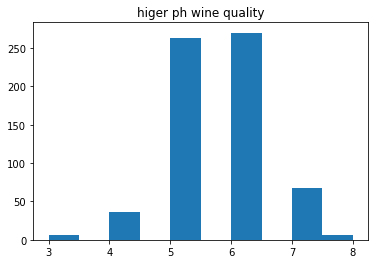

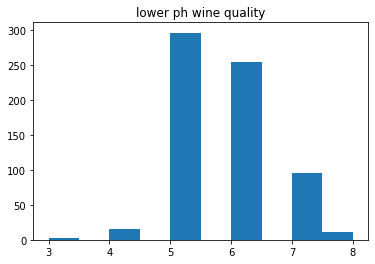

In [32]:
# calculate the mean ph and classify them into 2 groups
from scipy import stats
acidity_mean = data_cleaned.pH.mean()
high_ph = data_cleaned[data_cleaned.pH >= acidity_mean]
low_ph = data_cleaned[data_cleaned.pH < acidity_mean]

print(stats.ttest_ind(high_ph.quality, low_ph.quality))

plt.figure(0)
plt.title("higer ph wine quality")
plt.hist(high_ph.quality)
plt.figure(1)
plt.title("lower ph wine quality")
plt.hist(low_ph.quality)


 ### Risidual sugar and wine quality
 Second, we look into whether a wine with higher risidual sugar impacts wine quality. We split the data into 2 groups with repect to wines that have higher risidual sugar and the ones with lower sugar. Therefore, we structure our null hypothesis as follows:
 H0: Wines of higher residual sugar has no impact on average wine quality
 H1: Wines of higher residual sugar has an impact on average wine quality
 Since we are comparing the sample mean of the wine quality between 2 groups with each iid sample, we run the independent t test. With a t-test score of -0.05 and a p value of 0.95 > 0.05, we here accepts the null hypothesis that higher residual sugar has no impact on wine quality

MannwhitneyuResult(statistic=192327.5, pvalue=0.6964305687195584)
Ttest_indResult(statistic=-0.055998494125584865, pvalue=0.9553514685908338)


(array([  6.,   0.,  36.,   0., 361.,   0., 366.,   0., 103.,  11.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

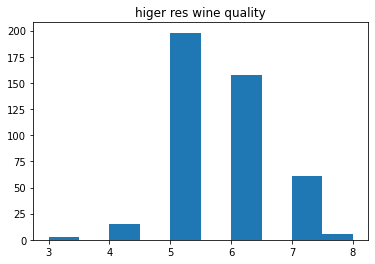

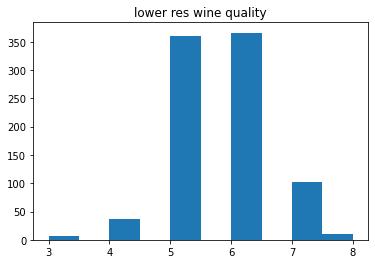

In [34]:
residual_mean = data_cleaned["residual sugar"].mean()
high_res = data_cleaned[data_cleaned["residual sugar"] >= residual_mean]
low_res = data_cleaned[data_cleaned["residual sugar"] < residual_mean]

print(stats.mannwhitneyu(high_res.quality, low_res.quality))
print(stats.ttest_ind(high_res.quality, low_res.quality))


plt.figure(0)
plt.title("higer res wine quality")
plt.hist(high_res.quality)
plt.figure(1)
plt.title("lower res wine quality")
plt.hist(low_res.quality)



 ### Chlorides and wine quality
  Finally, we look into whether a wine with higher chlorides impacts wine quality. We split the data into 2 groups with repect to wines that have higher chlorides and the ones with lower chlorides. Therefore, we structure our null hypothesis as follows:
 H0: Wines of higher chlorides has no impact on average wine quality
 H1: Wines of higher chlorides has an impact on average wine quality
 Since we are comparing the sample mean of the wine quality between 2 groups with each iid sample, we run the independent t test. With a t-test score of -4.55 and a p value of 5.8e-06 < 0.05, we here reject the null hypothesis that higher chlorides has no impact on wine quality

MannwhitneyuResult(statistic=176424.0, pvalue=6.6935191462488085e-06)
Ttest_indResult(statistic=-4.550511137519167, pvalue=5.843185933227327e-06)


(array([  4.,   0.,  31.,   0., 316.,   0., 351.,   0., 115.,  16.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

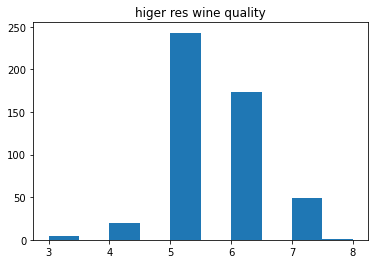

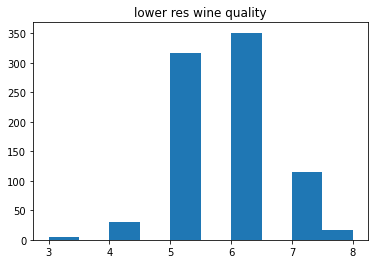

In [35]:
chlorides_mean = data_cleaned["chlorides"].mean()
high_chl = data_cleaned[data_cleaned["chlorides"] >= chlorides_mean]
low_chl = data_cleaned[data_cleaned["chlorides"] < chlorides_mean]

print(stats.mannwhitneyu(high_chl.quality, low_chl.quality))
print(stats.ttest_ind(high_chl.quality, low_chl.quality))


plt.figure(0)
plt.title("higer res wine quality")
plt.hist(high_chl.quality)
plt.figure(1)
plt.title("lower res wine quality")
plt.hist(low_chl.quality)